# Preprocessing Part

In [63]:
import pandas as pd
df=pd.read_csv('C:/Users/kaism/Desktop/csv/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
#localisation of missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
df.isnull().sum().sum()

866

In [67]:
#replace missing values in Age feature by the mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [68]:
print(df['Cabin'].value_counts())

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
A10            1
C104           1
E50            1
A6             1
B73            1
Name: Cabin, Length: 147, dtype: int64


In [69]:
df['Cabin'].fillna('G6',inplace=True)

In [70]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
df['Embarked'].fillna('S',inplace=True)

In [72]:
df.isnull().sum().sum()

0

# Data visualisation

In [73]:
# informations about the distribution of numerical features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

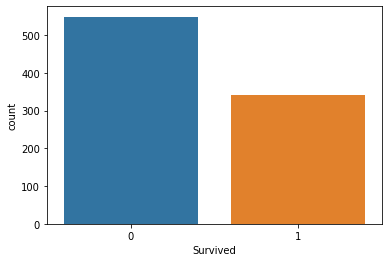

In [75]:
#survived barplot
sns.countplot(x="Survived", data=df)

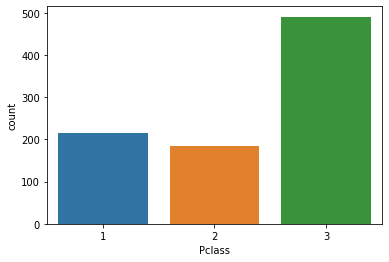

In [76]:
#Class barplot
sns.countplot(x="Pclass", data=df)

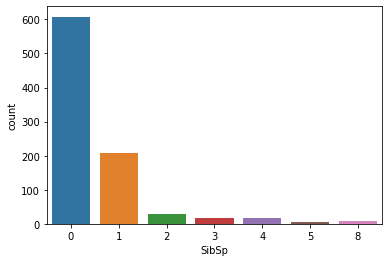

In [77]:
#SibSp barplot
sns.countplot(x="SibSp", data=df)

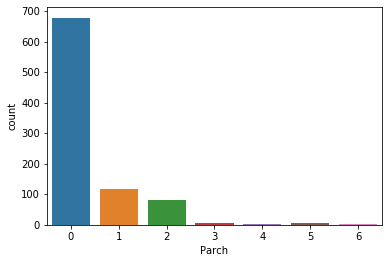

In [78]:
#Parch barplot
sns.countplot(x="Parch", data=df)

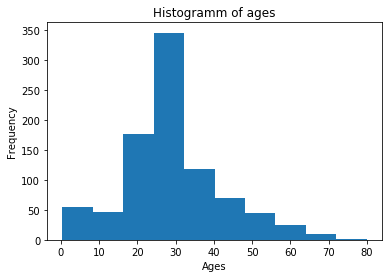

In [79]:
#Histogramme des ages
plt.title('Histogramm of ages')
plt.xlabel('Ages')
df['Age'].plot.hist()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

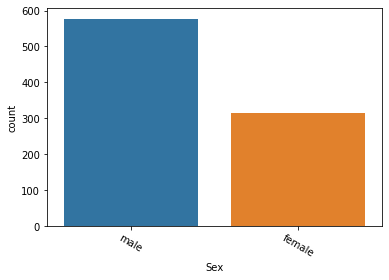

In [80]:
# barplot des sexes
sns.countplot(x='Sex',data=df)
plt.xticks(rotation=-30)

# Correlation between features

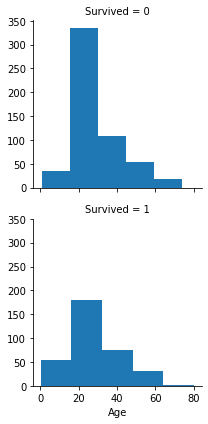

In [81]:
#Correlation between 'Age' and 'Survived'
grid=sns.FacetGrid(df,row='Survived')
grid.map(plt.hist,'Age',bins=5)

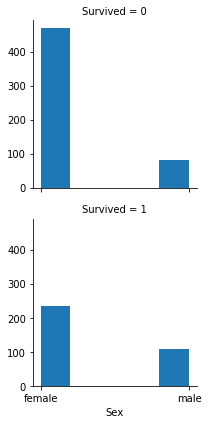

In [82]:
#Correlation between 'Sex' and 'Survived'
grid1=sns.FacetGrid(df,row='Survived')
grid1.map(plt.hist,'Sex',bins=5)

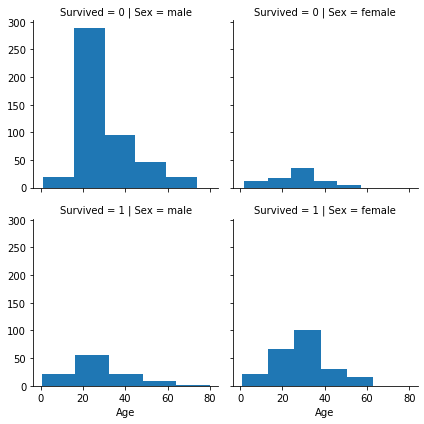

In [83]:
#Correlation between 'Age' ,'Sex' and 'Survived'
grid2=sns.FacetGrid(df,row='Survived',col='Sex')
grid2.map(plt.hist,'Age',bins=5)

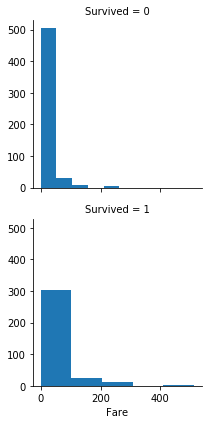

In [84]:
#Correlation between Fare and Survived
grid3=sns.FacetGrid(df,row='Survived')
grid3.map(plt.hist,'Fare',bins=5)

# C. Correlation map

In [85]:
#features categorization

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
#Survived categorization
encoder=LabelEncoder()
df["Survived"]=encoder.fit_transform(df["Survived"])
df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [88]:
#Sex categorization
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [89]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [90]:
#Embarked categorization

In [91]:
df["Embarked"] = encoder.fit_transform(df["Embarked"])
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

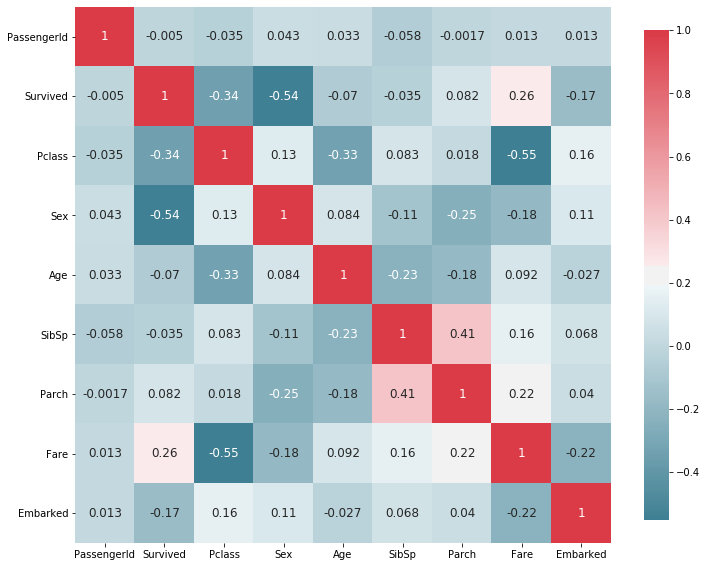

In [92]:
def plot_correlation_map(dataset):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

plot_correlation_map(df)

A correlation map is a graphical representation of the correlation matrix for the variables in a data set. It measures how change in one variable is associated with change in another variable. The closer the correlation value is to -1 or 1 the stronger the association, the closer to 0, the weaker the association.

Here, we see that the four variables with greatest correlation to survival are (in that order) : gender, passenger class, fare and age.

# Correlation between Pclass and Survived

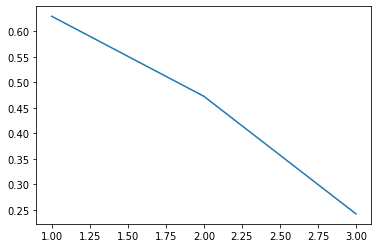

In [93]:
class_survived = df.groupby('Pclass')['Survived'].mean()
plt.plot(class_survived)

In [94]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Function to extract the title from the column Names

In [95]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [96]:
df['Title'] = df['Name'].map(lambda x: get_title(x))
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [97]:
Title_Dictionary = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Lady" :      "Royalty",
                    "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mrs" :        "Mrs",
                    "Mr" :       "Mr",
                    "Master":     "Master"
                    }

In [98]:
df['Title'].replace(Title_Dictionary, inplace=True)

In [99]:
df['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: Title, Length: 891, dtype: object

In [100]:
#Name column dropping
df.drop("Name", axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

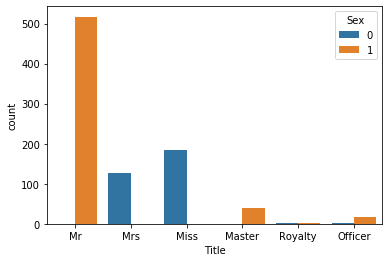

In [102]:
#Name column dropping
sns.countplot(x="Title", hue="Sex", data=df)

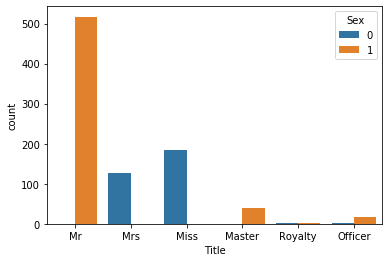

In [103]:
#Correlation between Title and Sex
sns.countplot(x="Title", hue="Sex", data=df)

In [110]:

age_category = []

for age in df.Age:
    if age in range(0,11):
        age_category.append("Child")
    elif age in range(11,21):
        age_category.append("Young")
    elif age in range(21,51):
        age_category.append("Adult")
    else:
        age_category.append("Senior")
        
df['Age_category'] = age_category 
df.Age_category



0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
886     Adult
887     Young
888    Senior
889     Adult
890     Adult
Name: Age_category, Length: 891, dtype: object

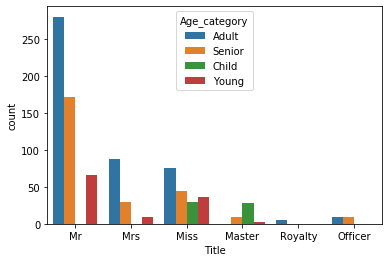

In [119]:
#Correlation between Title and Age
sns.countplot(x="Title", hue="Age_category", data=df)

In [115]:
fare_category = []

for fare in df.Fare:
    if int(fare) in range(0,26):
        fare_category.append("Very cheap")
    elif int(fare) in range(26,51):
        fare_category.append("Cheap")
    elif int(fare) in range(51,101):
        fare_category.append("Medium")
    else:
        fare_category.append("Expensive")
        
df['Fare_category'] = fare_category
df.Fare_category

0      Very cheap
1          Medium
2      Very cheap
3          Medium
4      Very cheap
          ...    
886    Very cheap
887         Cheap
888    Very cheap
889         Cheap
890    Very cheap
Name: Fare_category, Length: 891, dtype: object

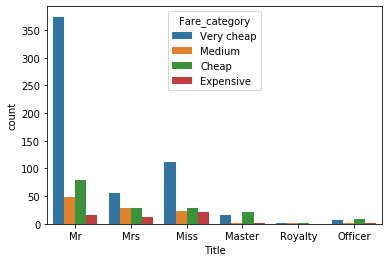

In [116]:
#Correlation between Title and Fare
sns.countplot(x="Title", hue="Fare_category", data=df)

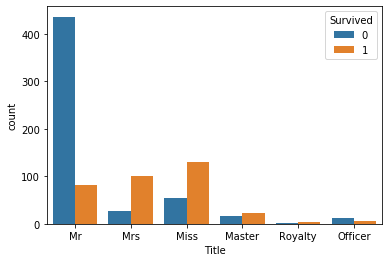

In [120]:
#Correlation between Title and Survived

sns.countplot(x="Title", hue="Survived", data=df)

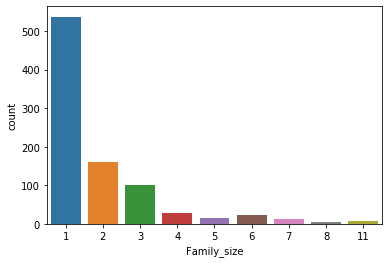

In [121]:
#Family size
df['Family_size'] = df['SibSp'] + df['Parch'] + 1
sns.countplot(x='Family_size', data=df)

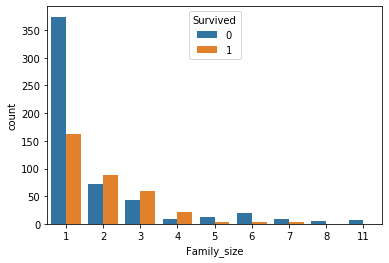

In [122]:
sns.countplot(x='Family_size', hue='Survived', data=df)